<h1>Portfolio Selection - Markowitz (1952) </h1>
<h4> The goal is to implement an equity portfolio following the Modern Portfolio Theory of Harry Markowitz.</br></br>
As per the assumptions, transaction costs are not considered while money can be borrowed and lent at risk-free rate.</br></br>
The optimal portfolio can be found either by maximizing the expected Sharpe ratio or by minimizing the overall volatility. 
</h4> 

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

import riskfolio as rp
import matplotlib.pyplot

In [2]:
pd.options.display.float_format = '{:,.6f}'.format
warnings.filterwarnings("ignore")

In [3]:
# Dates
start = '2023-01-01'
end = '2023-05-31'

In [4]:
# symbol universe
assets = ['AAPL','MSFT','AMZN','NVDA','GOOGL','TSLA','GOOG','META','UNH','XOM']

In [5]:
# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]

data = data.dropna(axis=1)
data.columns = data.columns.droplevel()

# overwriting the assets list to exclude tickers not available
assets = list(data.columns)

[*********************100%***********************]  10 of 10 completed


In [6]:
# Calculating returns
Y = data[assets].pct_change().dropna()
display(Y.head())

,AAPL,AMZN,GOOG,GOOGL,META,MSFT,NVDA,TSLA,UNH,XOM
Date,,,,,,,,,,
2023-01-04,0.010314,-0.007924,-0.011037,-0.011670,0.021084,-0.043743,0.030318,0.051249,-0.027264,0.002911
2023-01-05,-0.010605,-0.023726,-0.021869,-0.021344,-0.003376,-0.029638,-0.032816,-0.029039,-0.028821,0.022374
2023-01-06,0.036794,0.035611,0.016019,0.013225,0.024263,0.011785,0.041640,0.024651,0.000082,0.012087
2023-01-09,0.004089,0.014870,0.007260,0.007786,-0.004230,0.009736,0.051753,0.059349,0.000122,-0.018637
2023-01-10,0.004456,0.028732,0.004955,0.004544,0.027188,0.007617,0.017981,-0.007681,-0.008285,0.014935


In [7]:
# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAPL,AMZN,GOOG,GOOGL,META,MSFT,NVDA,TSLA,UNH,XOM
weights,0.452065,0.000000,0.000000,0.000000,0.213247,0.000000,0.324996,0.009691,0.000000,0.000000


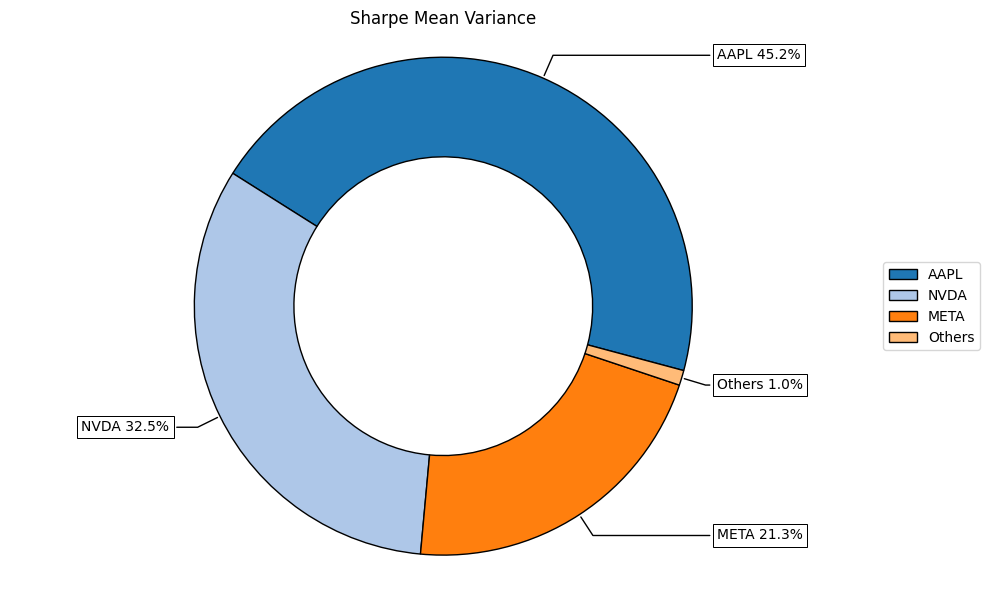

In [8]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [9]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAPL,AMZN,GOOG,GOOGL,META,MSFT,NVDA,TSLA,UNH,XOM
0,0.298898,0.065682,0.000000,0.000000,0.000000,0.084821,0.000000,0.000000,0.435336,0.115263
1,0.373902,0.054225,0.000000,0.000000,0.040231,0.023206,0.063394,0.000000,0.364948,0.080093
2,0.402576,0.046925,0.000000,0.000000,0.059518,0.000000,0.091687,0.000000,0.334019,0.065276
3,0.421870,0.034543,0.000000,0.000000,0.073961,0.000000,0.111925,0.000000,0.303173,0.054527
4,0.438668,0.023697,0.000000,0.000000,0.086548,0.000000,0.129518,0.000000,0.276398,0.045171


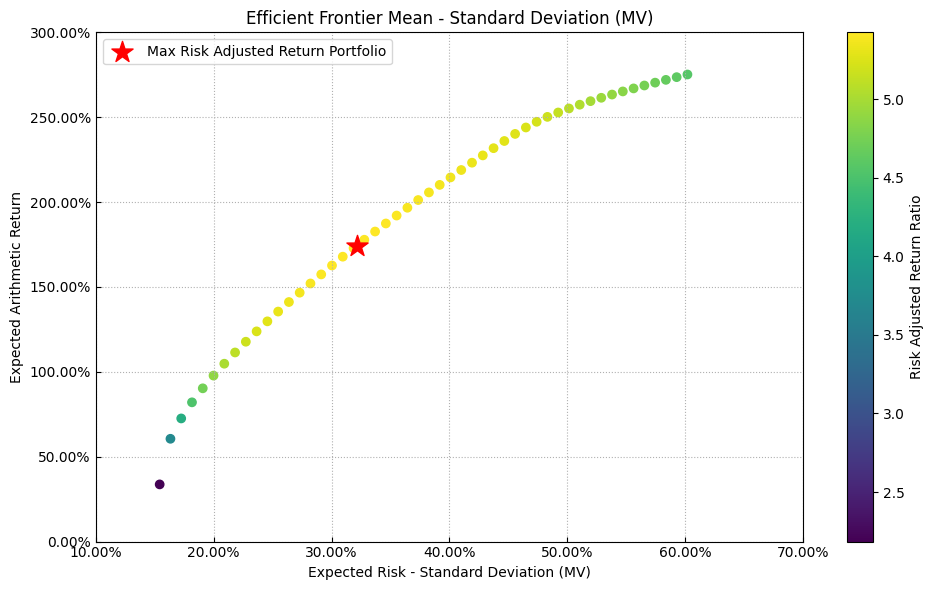

In [10]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

<h4>Testing different Risk Measures and compare the asset allocation of resulting portfolios</h4>

Risk Measures available:</br>
'MV': Standard Deviation.</br>
'MAD': Mean Absolute Deviation.</br>
'MSV': Semi Standard Deviation.</br>
'FLPM': First Lower Partial Moment (Omega Ratio).</br>
'SLPM': Second Lower Partial Moment (Sortino Ratio).</br>
'CVaR': Conditional Value at Risk.</br>
'EVaR': Entropic Value at Risk.</br>
'WR': Worst Realization (Minimax)</br>
'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).</br>
'ADD': Average Drawdown of uncompounded cumulative returns.</br>
'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.</br>
'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.</br>
'UCI': Ulcer Index of uncompounded cumulative returns.</br>

In [11]:
rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
AAPL,45.21%,0.00%,0.00%,0.00%,0.00%,31.58%,0.00%,0.00%,0.00%,20.86%,27.27%,16.14%,0.00%
AMZN,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,12.14%,0.00%,3.80%,0.00%,0.00%,0.00%
GOOG,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
GOOGL,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
META,21.32%,52.68%,56.69%,59.95%,55.44%,36.67%,70.54%,72.81%,41.44%,23.62%,24.94%,30.05%,40.68%
MSFT,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
NVDA,32.50%,47.32%,43.31%,40.05%,44.56%,29.14%,29.46%,15.05%,32.48%,41.32%,39.16%,46.71%,42.91%
TSLA,0.97%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,15.75%,0.00%,0.00%,0.06%,11.90%
UNH,0.00%,0.00%,0.00%,0.00%,0.00%,2.51%,0.00%,0.00%,10.33%,10.39%,8.64%,7.04%,4.50%
XOM,0.00%,0.00%,0.00%,0.00%,0.00%,0.09%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

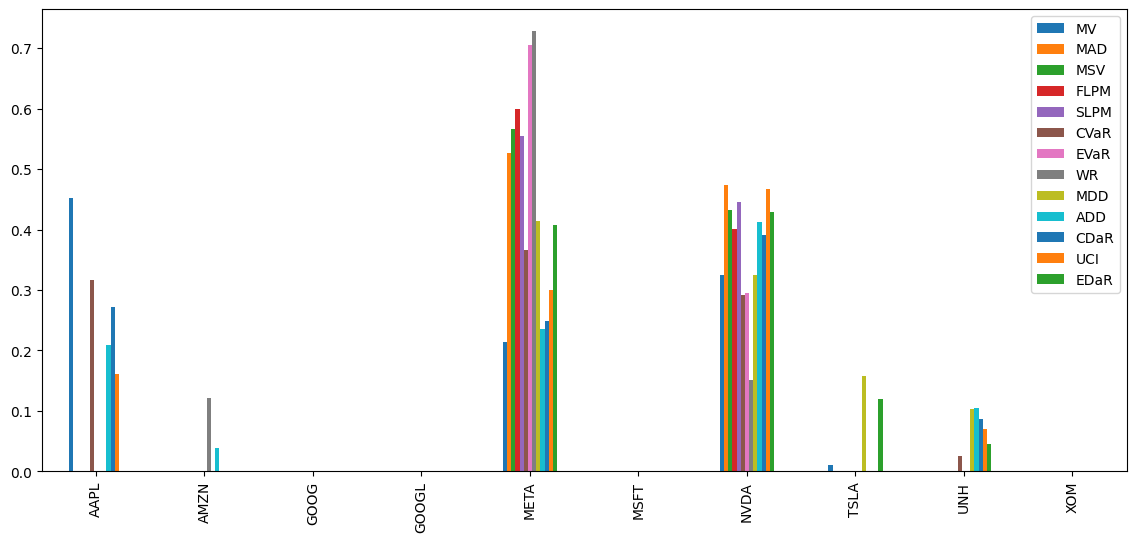

In [12]:
fig = matplotlib.pyplot.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

<h4>As expected, the mean-variance portfolio is always skewed to specific tickers which make the majority of the portfolio (in this case META and NVDA) even when using different risk measures.</h4>